In [1]:
import numpy as np
from tqdm import tqdm_notebook 

def get_float_value(filename):    
    N_big = 0
    mynumbers = []
    with open(filename) as f:
        for line in f:
            N_big += 1
            mynumbers.append([float(n) for n in line.strip().split(' ')])

    i = 0
    
    for pair in mynumbers:
        try:
            float_val = pair[0]
            i +=1
        except IndexError:
            print("A line in the file doesn't have enough entries.")
    return float_val

def append_refined_statistics(input_arrray, output_mean_set, output_std_set, output_refined_array = False):
    input_arrray = np.asarray(input_arrray).reshape(-1)
    std_of_set = np.std(input_arrray)
    current_mean = np.mean(input_arrray)
    deviation_grade = std_of_set > np.abs(input_arrray - current_mean)
    
    output_std_set.append(std_of_set)
    if (np.sum(deviation_grade) < 1):        
        output_mean_set.append(current_mean)
    else:
        refined_array = input_arrray[deviation_grade]
        output_mean_set.append(np.mean(refined_array))
    if output_refined_array:
        return refined_array

In [3]:
for power in range(20):
    N = 2**power
    N_2 = N**2
    memory = 25.0 * N_2 * 64 / 8 / 2**10 / 2**10 / 2**10
    print("power = %10.i \t N = %10.i\t\tmemory = %11.2f" % (power, N, memory))

power =          0 	 N =          1		memory =        0.00
power =          1 	 N =          2		memory =        0.00
power =          2 	 N =          4		memory =        0.00
power =          3 	 N =          8		memory =        0.00
power =          4 	 N =         16		memory =        0.00
power =          5 	 N =         32		memory =        0.00
power =          6 	 N =         64		memory =        0.00
power =          7 	 N =        128		memory =        0.00
power =          8 	 N =        256		memory =        0.01
power =          9 	 N =        512		memory =        0.05
power =         10 	 N =       1024		memory =        0.20
power =         11 	 N =       2048		memory =        0.78
power =         12 	 N =       4096		memory =        3.12
power =         13 	 N =       8192		memory =       12.50
power =         14 	 N =      16384		memory =       50.00
power =         15 	 N =      32768		memory =      200.00
power =         16 	 N =      65536		memory =      800.00
power =       

In [106]:
residual_means_N = []
residual_stds_N = []

# folder = "/CUDA/GTX1080Ti/Residuals/"
folder = "/CUDA/V100/Residuals/"
# folder = "/MKL/"

for power in tqdm_notebook(range(8, 13)):
    residual_means = []
    residual_stds = []
    N = 2**power
    for maxiter in range(3, 50):
        residual_test = []
        for repetition in range(100):
            residual_test.append(get_float_value("/media/linux/4db3d51d-3503-451d-aff7-07e3ce95927e/Archive/Output" + folder + "time_" + str(N) + "/residual_" + str(maxiter * 100 + repetition) +  ".txt"))
        append_refined_statistics(residual_test, residual_means, residual_stds)
    residual_means_N.append(residual_means)
    residual_stds_N.append(residual_stds)
    
# for power in tqdm_notebook([13]):
#     residual_means = []
#     residual_stds = []
#     N = 2**power
#     for maxiter in range(3, 40):
#         residual_test = []
#         for repetition in range(100):
#             residual_test.append(get_float_value("/media/linux/4db3d51d-3503-451d-aff7-07e3ce95927e/Archive/Output" + folder + "time_" + str(N) + "/residual_" + str(maxiter * 100 + repetition) +  ".txt"))
#         append_refined_statistics(residual_test, residual_means, residual_stds)
#     residual_means_N.append(residual_means)
#     residual_stds_N.append(residual_stds)

In [92]:
# print(N)

# import os
# from shutil import copyfile
# prefix = "/media/linux/4db3d51d-3503-451d-aff7-07e3ce95927e/Archive/Output" + folder + "time_" + str(N) + "/residual_"
# for i in range(10, 11):
#     postfix0 = str(i) + '.txt'
#     postfix1 = '11.txt'
#     for maxiter in tqdm_notebook(range(3, 40)):
#         exists = os.path.isfile(prefix + str(maxiter) + postfix0)
#         if exists == 0:
#             copyfile(prefix + str(maxiter) + postfix1, prefix + str(maxiter) + postfix0)

8192


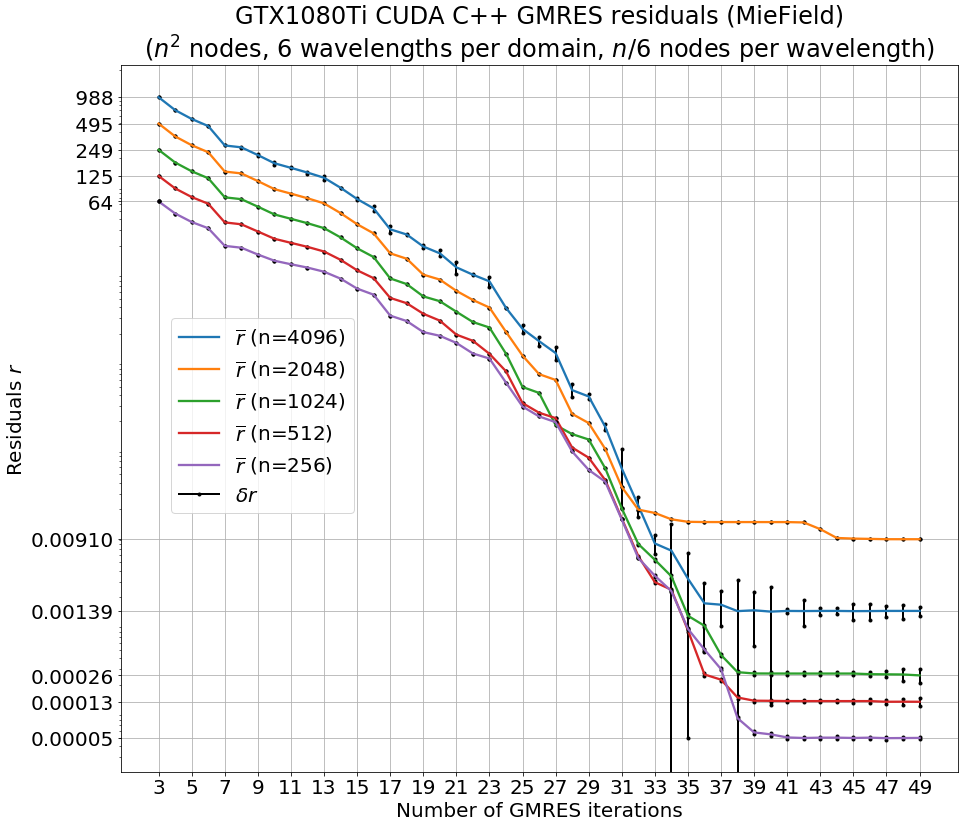

In [107]:
plt.figure(figsize=(15, 13))
title = "GTX1080Ti CUDA C++ GMRES residuals (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"

y_ticks = []
y_ticks_view = []
for power in tqdm_notebook(np.arange(8, 13)[::-1]):
    N = 2**power

    for i in range(len(residual_means_N[power - 8])):
        plt.plot([i + 3, i + 3], [residual_means_N[power - 8][i] - residual_stds_N[power - 8][i]/2, residual_means_N[power - 8][i] + residual_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2)

    plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], "-", label = "$\overline{r}$ (n=" + str(N) + ")", linewidth = 2.3)
    if power != 13:
        y_ticks.append(residual_means_N[power - 8][-1])
    y_ticks.append(residual_means_N[power - 8][0])
    if power != 13:
        y_ticks_view.append("%0.5f" % residual_means_N[power - 8][-1])
    y_ticks_view.append("%4.0f" % residual_means_N[power - 8][0])
plt.plot([3, 3], [residual_means_N[0][0] - residual_stds_N[0][0]/2, residual_means_N[0][0] + residual_stds_N[0][0]/2], ".-", c="black", label = "$\delta r$", linewidth = 2)
plt.title(title, fontsize = font * 1.2)
plt.legend(bbox_to_anchor=(0.35, 0.62),
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(3, 50, 2), fontsize = font)
plt.yticks(y_ticks, y_ticks_view, fontsize = font)
plt.ylabel("Residuals $r$", fontsize = font)
plt.xlabel("Number of GMRES iterations", fontsize = font)
plt.grid(True)

plt.show()

In [12]:
# import matplotlib.pyplot as plt
# from time import time

# font = 20


# plt.figure(figsize=(15, 10))
# for power in tqdm_notebook(range(8, 14)):
#     if power != 9:
#         N = 2**power
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], label = "means(n=" + str(N) + ")")
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_stds_N[power - 8], "--", label = "stds(n=" + str(N) + ")")
    
# plt.title("CUDA C++ GMRES residuals (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)", fontsize = font * 1.2)
# plt.legend(bbox_to_anchor=(0.65, 0.25),
#            bbox_transform=plt.gcf().transFigure, fontsize = font)
# plt.xticks(fontsize = font)
# plt.yticks(fontsize = font)
# plt.show()

# plt.figure(figsize=(15, 10))
# for power in tqdm_notebook(range(8, 14)):
#     if power != 9:
#         N = 2**power
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], label = "n=" + str(N))
    
# plt.title("CUDA C++ GMRES residual means (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)", fontsize = font * 1.2)
# plt.legend(bbox_to_anchor=(0.5, 0.5),
#            bbox_transform=plt.gcf().transFigure, fontsize = font)
# plt.xticks(np.arange(3, 50, 2), fontsize = font)
# plt.yticks(fontsize = font)
# plt.ylabel("Residual means", fontsize = font)
# plt.xlabel("Number of GMRES iterations", fontsize = font)
# plt.show()

# plt.figure(figsize=(15, 10))
# title = "CUDA C++ GMRES residual standart deviations (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"
# for power in tqdm_notebook(range(8, 14)):
#     if power != 9:
#         N = 2**power
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_stds_N[power - 8], "--", label = "n=" + str(N))

# plt.title(title, fontsize = font * 1.2)
# plt.legend(bbox_to_anchor=(0.5, 0.8),
#            bbox_transform=plt.gcf().transFigure, fontsize = font)
# plt.xticks(np.arange(3, 50, 2), fontsize = font)
# plt.yticks(fontsize = font)
# plt.ylabel("Residual standart devations", fontsize = font)
# plt.xlabel("Number of GMRES iterations", fontsize = font)
# plt.show()
# # plt.savefig("CUDA C++ GMRES residuals"+'.%.5f.png' % time())